# Movies Recommendations


### ETL

In [1]:
import pandas as pd
import numpy as np

Carga de datos

In [2]:
# Se extrae directamente desde un archivo en la carpeta de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Se cargan los datos a un dataframe
movies = pd.read_csv("/content/drive/MyDrive/Modelo de Recomendaciones (Movies)/movies_dataset.csv")

<ipython-input-3-ae0dddb60e7b>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("/content/drive/MyDrive/Modelo de Recomendaciones (Movies)/movies_dataset.csv")


In [4]:
# movies = pd.read_csv("/movies_dataset.csv")

In [5]:
movies.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [6]:
movies_final = movies

In [7]:
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Valores nulos de los campos revenue, budget rellenados por el número 0

In [8]:
movies_final['revenue'].fillna(0, inplace=True)

In [9]:
movies_final['budget'].fillna(0, inplace=True)

 Valores nulos del campo release_date  deben eliminarse

In [10]:
movies_final.dropna(subset=['release_date'], inplace=True)

Columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget

In [11]:
# movies_final['return'] = movies_final['revenue'].astype(float) / movies_final['budget'].astype(float)
# ValueError: could not convert string to float: '/ff9qCepilowshEtG2GYWwzt2bs4.jpg'

In [12]:
# Mascara del valor erroneo
# mask = movies_final[(movies_final['revenue'] == '/ff9qCepilowshEtG2GYWwzt2bs4.jpg') | (movies_final['budget'] == '/ff9qCepilowshEtG2GYWwzt2bs4.jpg')]

In [13]:
# Borrar fila
# movies_final = movies_final.drop(mask.index)

Se observa un error en los datos de la columna 'budget' ya que deberia ser el presupuesto de la película, en dólares. Y hay datos tipo '/ ... .jpg'

Son varias columnas entonces:

In [14]:
# Convertir valores numéricos a float y mantener valores de texto como string
movies_final['budget'] = pd.to_numeric(movies_final['budget'], errors='coerce').fillna(movies_final['budget'])
#El parámetro "errors" se establece en "coerce" para que cualquier valor que no se pueda convertir en un número se establezca en "NaN"
# Luego se rellena con el valor original fillna(movies_final['budget']), para luego ser borrados

In [15]:
# Errores
error = movies_final.loc[movies_final['budget'].apply(type) == str, 'budget']
error

19730    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
35587    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
Name: budget, dtype: object

In [16]:
# Borrar filas
movies_final = movies_final.drop(error.index)

In [17]:
movies_final['budget'] == 0

0        False
1        False
2         True
3        False
4         True
         ...  
45460     True
45462     True
45463     True
45464     True
45465     True
Name: budget, Length: 45376, dtype: bool

In [18]:
(movies_final['budget'] < 0).any()

False

In [19]:
# Calcular la columna "return" y asignar 0 cuando "budget" sea 0 ya que no se puede dividir entre 0
movies_final['return'] = np.where(movies_final['budget'] == 0, 0,
                                  movies_final['revenue'].astype(float) / movies_final['budget'].astype(float))

In [20]:
movies_final['return']

0        12.451801
1         4.043035
2         0.000000
3         5.090760
4         0.000000
           ...    
45460     0.000000
45462     0.000000
45463     0.000000
45464     0.000000
45465     0.000000
Name: return, Length: 45376, dtype: float64

Columnas que no serán utilizadas, video, imdb_id, adult, original_title, poster_path y homepage

In [21]:
Cols = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage']
movies_final = movies_final.drop(Cols, axis=1)

In [22]:
movies_final.head(1)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,12.451801


Fechas, con el formato AAAA-mm-dd

In [23]:
movies_final['release_date'] = pd.to_datetime(movies_final['release_date'])
movies_final['release_date'] = movies_final['release_date'].dt.strftime('%Y-%m-%d')


In [24]:
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45376 non-null  object 
 2   genres                 45376 non-null  object 
 3   id                     45376 non-null  object 
 4   original_language      45365 non-null  object 
 5   overview               44435 non-null  object 
 6   popularity             45376 non-null  object 
 7   production_companies   45376 non-null  object 
 8   production_countries   45376 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45376 non-null  float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       45376 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

 Crear la columna release_year donde se extraera el año de la fecha de estreno

In [25]:
movies_final['release_date'] = pd.to_datetime(movies_final['release_date'])
movies_final['release_year'] = movies_final['release_date'].dt.year

Desanidar Datos

belongs_to_collection


In [26]:
# Se extrae name de belongs_to_collection
# movies_final[['collection_id', 'collection_name', 'collection_poster_path', 'collection_backdrop_path']] = movies_final['belongs_to_collection'].str.extract(r"{'id': (\d+), 'name': '(.+?)', 'poster_path': '(.+?)', 'backdrop_path': '(.+?)'}")
movies_final['collection_name'] = movies_final['belongs_to_collection'].str.extract("'name': '([^']*)'")

In [27]:
movies_final.head(1)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year,collection_name
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,Toy Story Collection


In [28]:
# Eliminamos belongs_to_collection
movies_final = movies_final.drop('belongs_to_collection', axis=1)

genres

In [29]:
movies_final.loc[1, 'genres']

"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]"

In [30]:
import ast
# Convertimos la cadena en una lista de diccionarios
movies_final['genres'] = movies_final['genres'].apply(ast.literal_eval)

In [31]:
# Función para extraer los nombres de los géneros
def extract_names(genres_list):
    genres_names = [genre['name'] for genre in genres_list]
    genres_names = ', '.join(genres_names)
    return genres_names

# Aplicamos la función a cada elemento de la columna 'genres'
movies_final['genres_name'] = movies_final['genres'].apply(extract_names)

In [32]:
# Separamos
movies_final['genre'] = movies_final['genres_name'].str.split(', ')

# Crearmos una nueva columna duplicada para cada genero
movies_final = movies_final.explode('genre').reset_index(drop=True)

In [33]:
movies_final.head(4)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,status,tagline,title,vote_average,vote_count,return,release_year,collection_name,genres_name,genre
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,Toy Story Collection,"Animation, Comedy, Family",Animation
1,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,Toy Story Collection,"Animation, Comedy, Family",Comedy
2,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,Toy Story Collection,"Animation, Comedy, Family",Family
3,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035,1995,NaN,"Adventure, Fantasy, Family",Adventure


In [34]:
# Eliminamos genres y genres_name
movies_final = movies_final.drop(['genres', 'genres_name'], axis=1)

production_companies

In [35]:
movies_final.loc[3, 'production_companies']

"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]"

In [36]:
# Convertimos la cadena en una lista de diccionarios
movies_final['production_companies'] = movies_final['production_companies'].apply(ast.literal_eval)

In [37]:
# Aplicamos la función extract_names a cada elemento de la columna 'production_companies'
movies_final['production_companies_names'] = movies_final['production_companies'].apply(extract_names)

In [38]:
movies_final.loc[3, 'production_companies_names']

'TriStar Pictures, Teitler Film, Interscope Communications'

In [39]:
# Separamos
movies_final['production_companie'] = movies_final['production_companies_names'].str.split(', ')

# Crearmos una nueva columna duplicada para cada Compañia
movies_final = movies_final.explode('production_companie').reset_index(drop=True)

In [40]:
print(movies_final.loc[3, 'production_companie'],', ', movies_final.loc[4, 'production_companie'],', ', movies_final.loc[5, 'production_companie'])

TriStar Pictures ,  Teitler Film ,  Interscope Communications


In [41]:
# Eliminamos production_companies y production_companies_names
movies_final = movies_final.drop(['production_companies', 'production_companies_names'], axis=1)

production_countries

In [42]:
movies_final.loc[4, 'production_countries']

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [43]:
# Convertimos la cadena en una lista de diccionarios
movies_final['production_countries'] = movies_final['production_countries'].apply(ast.literal_eval)

In [44]:
# Aplicamos la función extract_names a cada elemento de la columna 'production_countries'
movies_final['production_country'] = movies_final['production_countries'].apply(extract_names)

In [45]:
# Eliminamos 'production_countries'
movies_final = movies_final.drop('production_countries', axis=1)

spoken_languages

In [46]:
movies_final.loc[3, 'spoken_languages']

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]"

In [47]:
# Convertimos la cadena en una lista de diccionarios
movies_final['spoken_languages'] = movies_final['spoken_languages'].apply(ast.literal_eval)

In [48]:
# Aplicamos la función extract_names a cada elemento de la columna 'spoken_languages'
movies_final['spoken_languages_names'] = movies_final['spoken_languages'].apply(extract_names)

In [49]:
movies_final.loc[3, 'spoken_languages_names']

'English, Français'

In [50]:
# Separamos
movies_final['spoken_language'] = movies_final['spoken_languages_names'].str.split(', ')

# Crearmos una nueva columna duplicada para cada Compañia
movies_final = movies_final.explode('spoken_language').reset_index(drop=True)

In [51]:
print(movies_final.loc[3, 'spoken_language'], ', ', movies_final.loc[4, 'spoken_language'])

English ,  Français


In [52]:
# Eliminamos spoken_languages y spoken_languages_names
movies_final = movies_final.drop(['spoken_languages', 'spoken_languages_names'], axis=1)

In [53]:
movies_final.head(1)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,return,release_year,collection_name,genre,production_companie,production_country,spoken_language
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,Toy Story Collection,Animation,Pixar Animation Studios,United States of America,English


In [54]:
movies_final.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'return', 'release_year',
       'collection_name', 'genre', 'production_companie', 'production_country',
       'spoken_language'],
      dtype='object')

In [55]:
movies_final = movies_final.drop_duplicates()

In [56]:
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250494 entries, 0 to 250759
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   budget               250494 non-null  object        
 1   id                   250494 non-null  object        
 2   original_language    250454 non-null  object        
 3   overview             248487 non-null  object        
 4   popularity           250494 non-null  object        
 5   release_date         250494 non-null  datetime64[ns]
 6   revenue              250494 non-null  float64       
 7   runtime              250038 non-null  float64       
 8   status               250359 non-null  object        
 9   tagline              143910 non-null  object        
 10  title                250494 non-null  object        
 11  vote_average         250494 non-null  float64       
 12  vote_count           250494 non-null  float64       
 13  return        

Buscar Datos erroneos / Nulos / Outliers


In [57]:
movies_final['genre'].unique()

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Foreign', '', 'Music',
       'Documentary', 'Western', 'TV Movie'], dtype=object)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

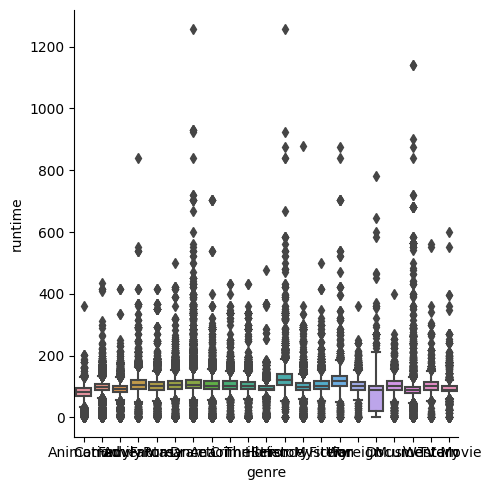

In [59]:
sns.catplot(x='genre', y="runtime", kind='box', data=movies_final)


Credits

In [60]:
credits = pd.read_csv("/content/drive/MyDrive/Modelo de Recomendaciones (Movies)/credits.csv")

In [61]:
credits.head(1)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


## Consultas

def cantidad_filmaciones_mes( Mes ): Se ingresa un mes en idioma Español. Debe devolver la cantidad de películas que fueron estrenadas en el mes consultado en la totalidad del dataset.
Ejemplo de retorno: X cantidad de películas fueron estrenadas en el mes de X

In [73]:
def cantidad_filmaciones_mes( Mes ):
  mes = Mes.lower()
  meses = {'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12}
  mes_nro = meses.get(mes)
  estrenos = movies_final[movies_final['release_date'].dt.month == mes_nro]
  cantidad = len(estrenos['id'].unique())
  return f'{cantidad} cantidad de películas fueron estrenadas en el mes de {mes.capitalize()}'


In [74]:
cantidad_filmaciones_mes('MAYO')

'3337 cantidad de películas fueron estrenadas en el mes de Mayo'

def cantidad_filmaciones_dia( Dia ): Se ingresa un día en idioma Español. Debe devolver la cantidad de películas que fueron estrenadas en día consultado en la totalidad del dataset.
                    Ejemplo de retorno: X cantidad de películas fueron estrenadas en los días X

In [81]:
def cantidad_filmaciones_dia( Dia ):
  dia = Dia.lower()
  dias = {'lunes': 'Monday', 'martes': 'Tuesday', 'miercoles': 'Wednesday', 'jueves': 'Thursday', 'viernes': 'Friday', 'sabado': 'Saturday', 'domingo': 'Sunday'}
  dia_en = dias.get(dia)
  estrenos = movies_final[movies_final['release_date'].dt.day_name() == dia_en]
  cantidad = len(estrenos['id'].unique())
  return f'{cantidad} cantidad de películas fueron estrenadas en los días {dia.capitalize()}'

In [83]:
cantidad_filmaciones_dia('JUEVES')

'7520 cantidad de películas fueron estrenadas en los días Jueves'

def score_titulo( titulo_de_la_filmación ): Se ingresa el título de una filmación esperando como respuesta el título, el año de estreno y el score.
                    Ejemplo de retorno: La película X fue estrenada en el año X con un score/popularidad de X

In [65]:
def score_titulo( titulo_de_la_filmación ):


def votos_titulo( titulo_de_la_filmación ): Se ingresa el título de una filmación esperando como respuesta el título, la cantidad de votos y el valor promedio de las votaciones. La misma variable deberá de contar con al menos 2000 valoraciones, caso contrario, debemos contar con un mensaje avisando que no cumple esta condición y que por ende, no se devuelve ningun valor.
                    Ejemplo de retorno: La película X fue estrenada en el año X. La misma cuenta con un total de X valoraciones, con un promedio de X

def get_actor( nombre_actor ): Se ingresa el nombre de un actor que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. Además, la cantidad de películas que en las que ha participado y el promedio de retorno. La definición no deberá considerar directores.
                    Ejemplo de retorno: El actor X ha participado de X cantidad de filmaciones, el mismo ha conseguido un retorno de X con un promedio de X por filmación

def get_director( nombre_director ): Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma